# CA1 Data Cleaning and Preparation

First we need to import relevant Pyhton libraries and packages.

In [47]:
# Importing libraries and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Also, adding a formatter which allows us to format the X and Y labels properly.

In [48]:
# Set formater for the charts
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

Then, we need to load the dataset into a DataFrame. The first file I will work with is in a csv format and contains the data for the population of Ireland since 1926 to 2023.

In [49]:
# Using the pandas read_csv function we will get a DataFrame object. A DataFrame is a two-dimensional, size-mutable
population_df = pd.read_csv('PEA11.20231013T111046.csv')

In [50]:
#checking the first 10 rows of the data so that we can get idea of the dataset
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876
7,PEA11,Population estimates from 1926,1926,1926,001,1 year,1,Male,Number,28374
8,PEA11,Population estimates from 1926,1926,1926,001,1 year,2,Female,Number,27502
9,PEA11,Population estimates from 1926,1926,1926,002,2 years,-,Both sexes,Number,58273


In [51]:
#By taking a look at the first 5 rows of the data we can have the following conclusion: 
#We have categorical variables - STATISTICS, STATISTIC Label, TLIST(A1)
#We have numerical variables - Year, C02076V02508 (identifier for the age group), C02199V02655 (code/identifier for the sex), VALUE
#We have qualitative variables - Age Group, Sex, Unit

In [52]:
#access the size of the dataset
print("There are", population_df.size, "values in total across the whole dataset")

There are 118170 values in total across the whole dataset


In [53]:
population_df.shape

(11817, 10)

In [54]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [55]:
#another function to check only the data type
population_df.dtypes

STATISTIC             object
STATISTIC Label       object
TLIST(A1)              int64
Year                   int64
C02076V03371          object
Single Year of Age    object
C02199V02655          object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

In [56]:
#this only works for continuous variables 
population_df.describe()

,TLIST(A1),Year,VALUE
count,11817.000000,11817.000000,1.181700e+04
mean,1996.410256,1996.410256,5.352461e+04
std,24.463165,24.463165,2.867754e+05
min,1926.000000,1926.000000,6.000000e+00
25%,1986.000000,1986.000000,1.242700e+04
50%,2004.000000,2004.000000,2.667500e+04
75%,2014.000000,2014.000000,3.557700e+04
max,2023.000000,2023.000000,5.281612e+06


In [57]:
population_df["Value_in_thousands"] = (population_df['VALUE'] / 1000).round(1)
population_df.head(20)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE,Value_in_thousands
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992,2972.0
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889,1506.9
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103,1465.1
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391,55.4
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084,28.1
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307,27.3
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876,55.9
7,PEA11,Population estimates from 1926,1926,1926,001,1 year,1,Male,Number,28374,28.4
8,PEA11,Population estimates from 1926,1926,1926,001,1 year,2,Female,Number,27502,27.5
9,PEA11,Population estimates from 1926,1926,1926,002,2 years,-,Both sexes,Number,58273,58.3


In [58]:
columns_to_include = [col for col in population_df.columns if col != 'VALUE']
population_df[columns_to_include].describe().round(3)

,TLIST(A1),Year,Value_in_thousands
count,11817.000,11817.000,11817.000
mean,1996.410,1996.410,53.525
std,24.463,24.463,286.775
min,1926.000,1926.000,0.000
25%,1986.000,1986.000,12.400
50%,2004.000,2004.000,26.700
75%,2014.000,2014.000,35.600
max,2023.000,2023.000,5281.600


In [59]:
#For the visualizations, I will use the column value_in_thousands in order to achieve a more readable view.
#For any calculations, I will be using the original column named 'VALUE' to achieve presicion. 

In [60]:
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [61]:
# Test with filtering BEGIN

all_ages = population_df[(population_df['Single Year of Age'] == 'All ages') & (population_df['Sex'] == 'Both sexes')]
all_ages.pivot(index='Year',columns='Sex', values='Value_in_thousands')

# Test with filtering END

Sex,Both sexes
Year,
1926,2972.0
1936,2968.4
1946,2955.1
1951,2960.6
1961,2818.3
1966,2884.0
1971,2978.2
1979,3368.2
1981,3443.4


In [62]:
male_data = population_df[(population_df['Sex'] == 'Male') & (population_df['Single Year of Age'] == 'All ages')]
female_data = population_df[(population_df['Sex'] == 'Female') & (population_df['Single Year of Age'] == 'All ages')]
years = population_df['Year'].unique()
male_values = male_data['VALUE'].values
female_values = female_data['VALUE'].values

population_table = pd.DataFrame({'Year': years, 'Male Population': male_values, 'Female Population': female_values})

population_table

,Year,Male Population,Female Population
0,1926,1506889,1465103
1,1936,1520454,1447966
2,1946,1494877,1460230
3,1951,1506597,1453996
4,1961,1416549,1401792
5,1966,1449032,1434970
6,1971,1495760,1482488
7,1979,1693272,1674945
8,1981,1729354,1714051
9,1986,1769690,1770953


<Axes: >

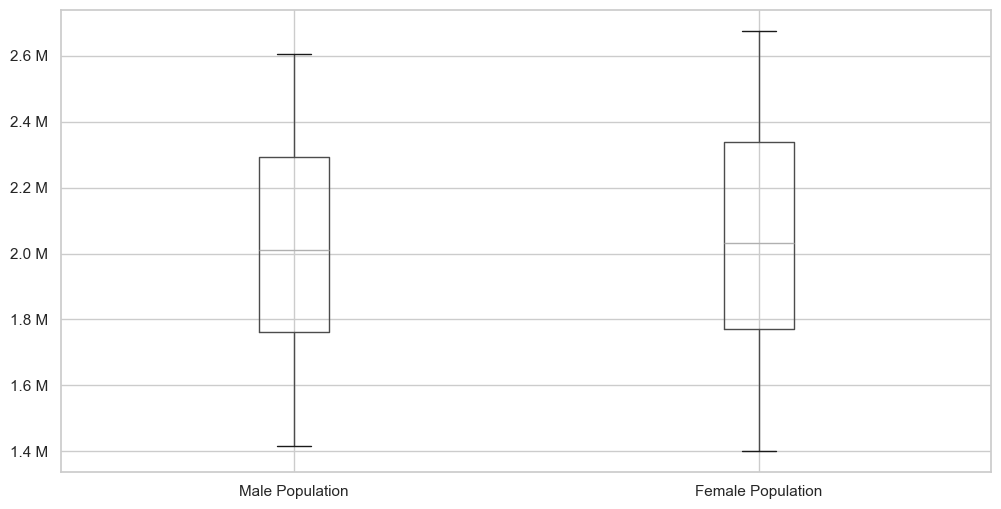

In [63]:
gender_table = population_table.drop(columns=['Year'])
plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
gender_table.boxplot()

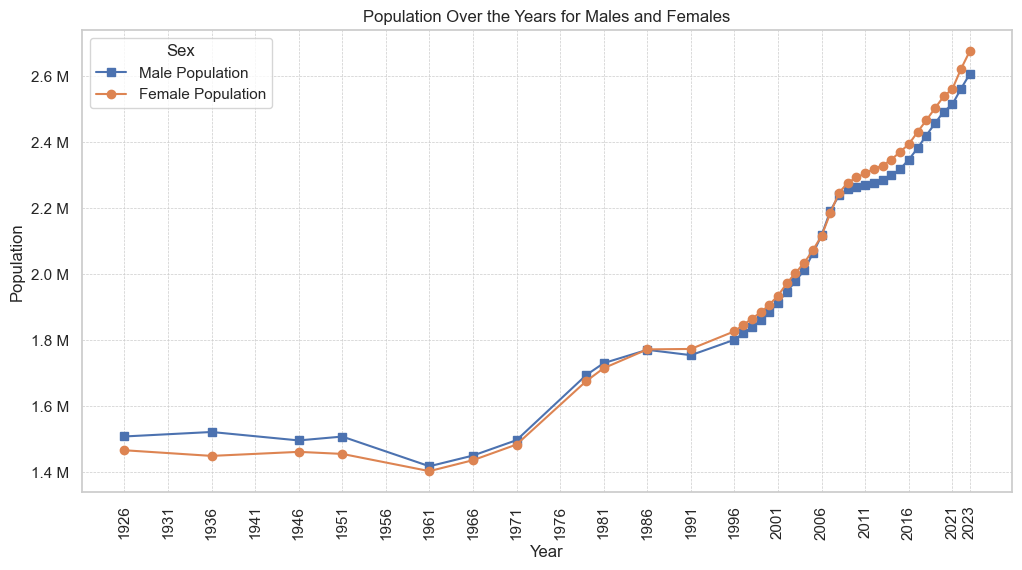

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male Population', marker='s')
plt.plot(years, female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

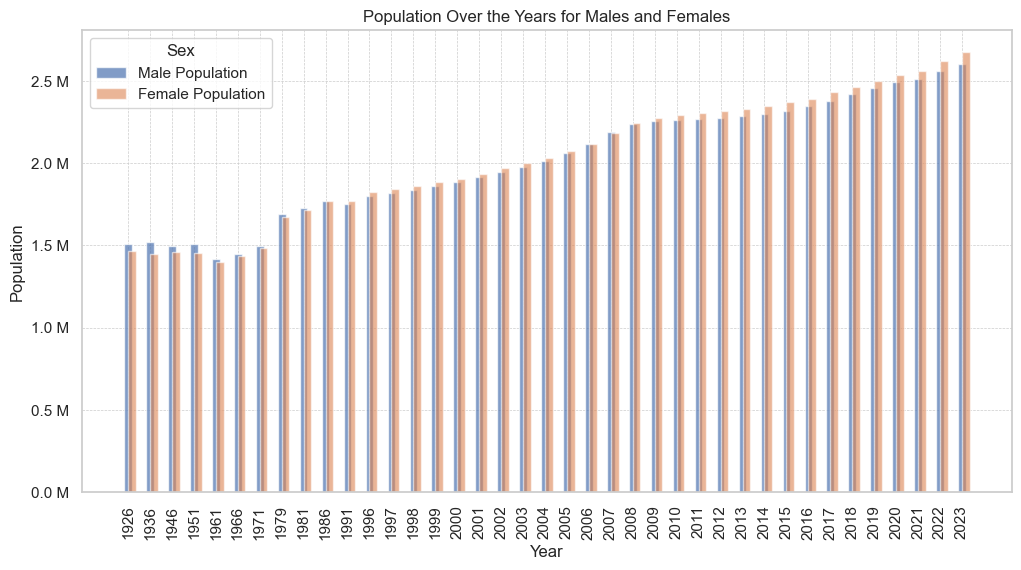

In [65]:
# BAR CHART
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(years))

plt.bar(index, male_values, bar_width, label='Male Population', align='center', alpha=0.7)
plt.bar(index, female_values, bar_width, label='Female Population', align='edge', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.xticks(index, years, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Sex')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

In [66]:
# IDEA
# Show the percentage increase or decrease in population for each period - between each year in the dataset or per 5-10 years.

In [112]:
pivot_table = population_df.pivot_table(index=['Year', 'Sex'], values='Value_in_thousands', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

     Year         Sex  Value_in_thousands
0    1926  Both sexes              5943.8
1    1926      Female              2930.1
2    1926        Male              3013.8
3    1936  Both sexes              5937.3
4    1936      Female              2896.5
..    ...         ...                 ...
112  2022      Female              5243.6
113  2022        Male              5123.5
114  2023  Both sexes             10563.1
115  2023      Female              5350.3
116  2023        Male              5212.8

[117 rows x 3 columns]


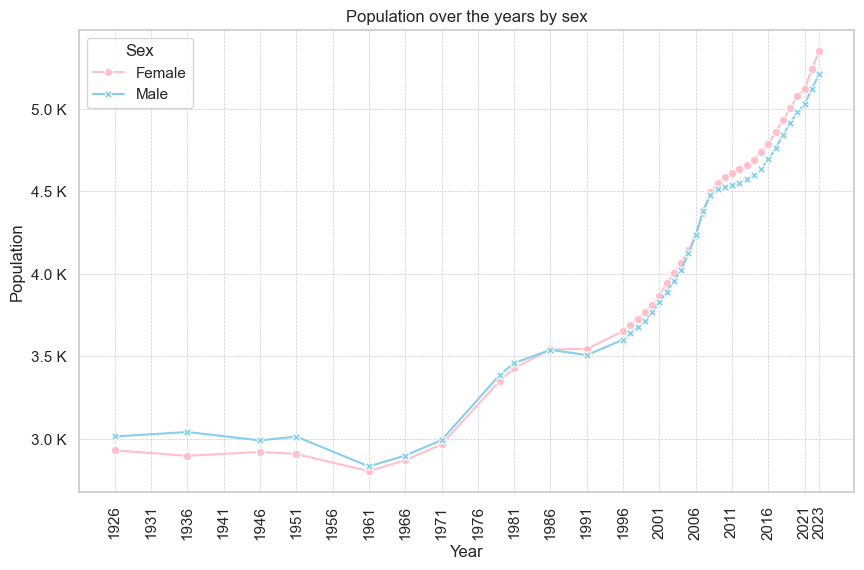

In [111]:
filtered_pivot_table = population_df[population_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='Value_in_thousands', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over the years by sex')

xticks = [years[0], years[-1]] + list(range(years[0] + tick_interval, years[-1], tick_interval))
plt.xticks(xticks, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.legend(title='Sex')
plt.show()

In [68]:
#if we want to include the objects we need the following but in our dataframe this doesn't give us a lot of useful information
population_df.describe(include=object)

,STATISTIC,STATISTIC Label,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT
count,11817,11817,11817,11817,11817,11817,11817
unique,1,1,101,101,3,3,1
top,PEA11,Population estimates from 1926,-,All ages,-,Both sexes,Number
freq,11817,11817,117,117,3939,3939,11817


In [69]:
#two methods to check if we have some null/missing values
#population_df.isnull().sum()
population_df.isna().sum()

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
Value_in_thousands    0
dtype: int64

In [70]:
population_df[population_df['VALUE'].isna()]

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE,Value_in_thousands


In [71]:
#we will clean some of the columns as they won't be useful for our analysis

to_drop = ['STATISTIC Label', 'STATISTIC', 'TLIST(A1)', 'C02076V03371', 'C02199V02655']

population_df.drop(to_drop, inplace=True, axis=1)

In [72]:
population_df.head()

,Year,Single Year of Age,Sex,UNIT,VALUE,Value_in_thousands
0,1926,All ages,Both sexes,Number,2971992,2972.0
1,1926,All ages,Male,Number,1506889,1506.9
2,1926,All ages,Female,Number,1465103,1465.1
3,1926,Under 1 year,Both sexes,Number,55391,55.4
4,1926,Under 1 year,Male,Number,28084,28.1


In [73]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [74]:
#we will be looking at the data only for the past 20 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] > 2002)]

In [75]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,Year,Single Year of Age,Sex,UNIT,VALUE,Value_in_thousands
5454,2003,All ages,Both sexes,Number,3979853,3979.9
5455,2003,All ages,Male,Number,1976914,1976.9
5456,2003,All ages,Female,Number,2002939,2002.9
5457,2003,Under 1 year,Both sexes,Number,60454,60.5
5458,2003,Under 1 year,Male,Number,31047,31.0


In [76]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [77]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex      VALUE
0  Both sexes  194842680
1      Female   98156914
2        Male   96685766


In [78]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex     VALUE
0   2003  Both sexes   7959706
1   2003      Female   4005878
2   2003        Male   3953828
3   2004  Both sexes   8090376
4   2004      Female   4066548
..   ...         ...       ...
58  2022      Female   5244024
59  2022        Male   5123908
60  2023  Both sexes  10563224
61  2023      Female   5350884
62  2023        Male   5212340

[63 rows x 3 columns]


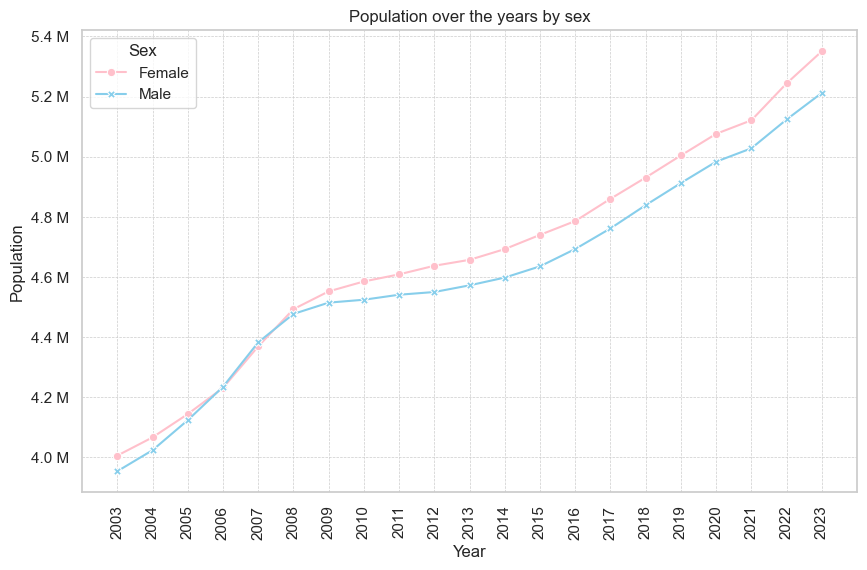

In [94]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']
pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex')
plt.show()

In the graprh representation above we can cleary see that the population of Ireland both for male and female has been increasing for the last ten years which automatically means that the population in general is increasing, which can be seen in the graph below.

Please keep in mind that those values are in thousands, which gives us a total of around 5.3 Million people in total for 2023. 

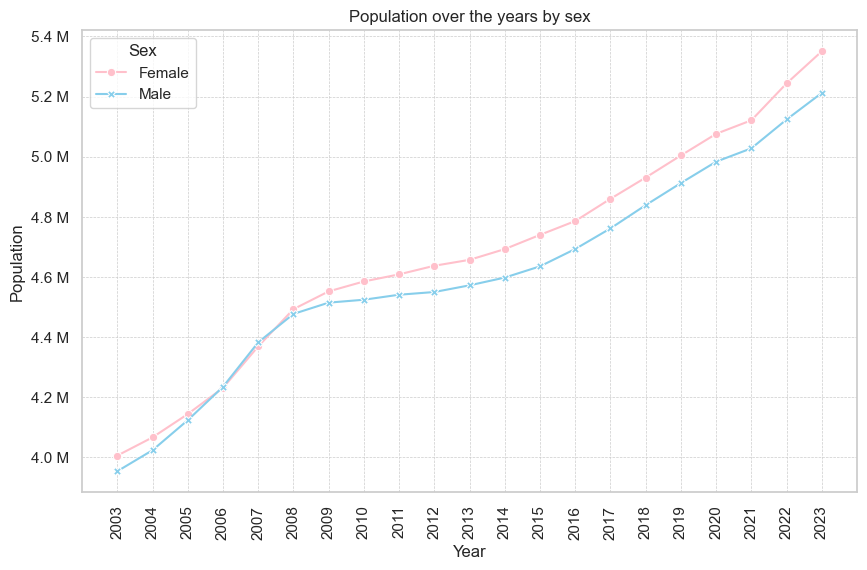

In [100]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex')
plt.show()


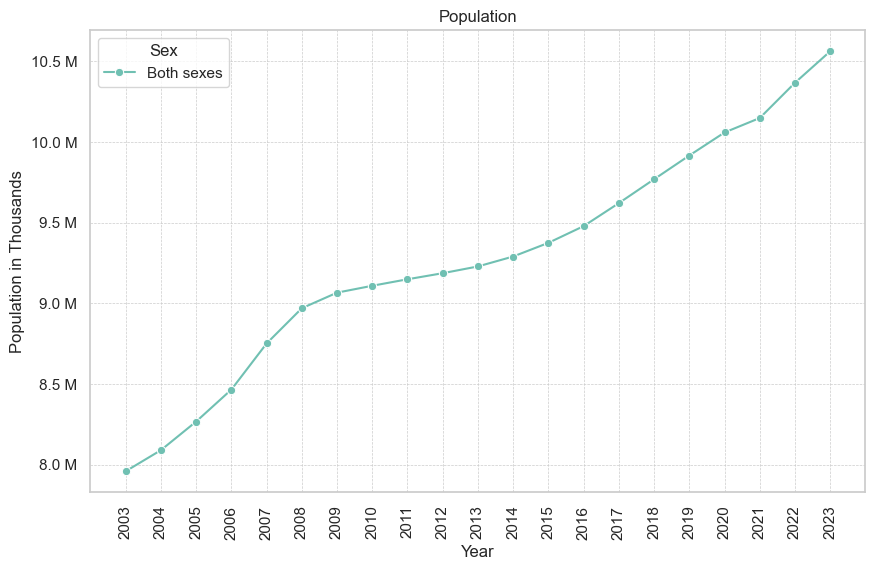

In [99]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex')
plt.show()